# 1. Praktikum - Musterlösung


## Aufgabe 1: Entscheidungsbaum

Im Rahmen dieser Aufgabe beschäftigen wir uns mit dem ‘Mushroom Data Set’, das Teil des UCI Machine Learning Repository ist1. Der Datensatz umfasst 8.124 Pilzsorten, die als essbare bzw. nicht genießbare Pilze klassifiziert sind und durch 22 Eigenschaften beschrieben werden. Das Ziel ist, einen möglichst guten Entscheidungsbaum für unbekannte Pilze zu erstellen.

Die benötigten Bibliotheken importieren und einige Einstellungen festlegen:

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#%config InlineBackend.figure_format = 'retina'
#pd.set_option('display.max_columns', None)
#style.use('ggplot')
#%matplotlib inline

### a) Import der Rohdaten von der Seite der UCI
Die Daten können per url direkt von der Seite der UCI heruntergeladen werden, siehe https://archive.ics.uci.edu/ml/datasets/Mushroom . 
Daten importieren und mal kurz reinschauen, was wir genau bekommen haben:

In [4]:
col_names = ['class' , 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 
'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
'spore-print-color', 'population', 'habitat']

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_csv(url, names = col_names)

data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [71]:
pd.get_dummies(data)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### b) Datenvorverarbeitung
Da sehen wir schon, dass alles kategorische, nominale Attribute sind. Das hätte man natürlich auch schon in der Beschreibung zum Datensatz rausgefunden (Datei 'agaricus-lepiota.names'), wenn man sie denn gelesen hätte...

Dort findet man übrigens auch noch folgenden wertvollen Hinweis: "Missing Attribute Values: 2480 of them (denoted by "?"), all for attribute #11." Das sollten wir uns gleich noch genauer anschauen...

In [5]:
data.describe(include = 'all').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Sieht auf die Schnelle schon ganz gut aus. Was noch auffällt, ist dass es beim Attribut 'veil-type' nur eine Ausprägung gibt. Das kann also noch entfernt werden.

Bevor wir uns die einzelnen Kategorien gleich noch genauer ansehen, vielleicht vorher trotzdem noch der Test auf fehlende Werte – einfach um unserer Paranoia Genüge zu tun und weil es zum guten Ton gehört:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Alles im grünen Bereich. Jetzt schauen wir noch schnell nach den Klassenlabeln, ob ein Klassenungleichgewicht (class imbalance) vorliegt. Falls ja, müssten wir eine gleichverteilte Stichprobe aus den Daten ziehen.

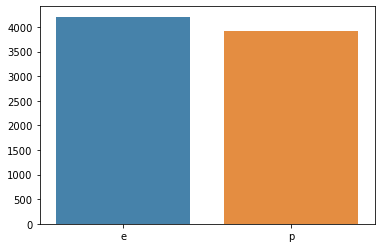

In [7]:
counts = data.iloc[:, 0].value_counts()
_ = sns.barplot(x = counts.index, y = counts.values, alpha = 0.9)

Damit können wir gut leben. Aber wir wissen ja schon, dass bei Attribut 11 Ungemach wartet. Schauen wir mal:

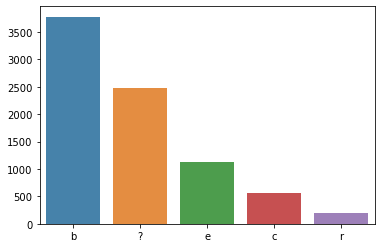

In [8]:
counts = data.iloc[:, 11].value_counts()
_ = sns.barplot(x = counts.index, y = counts.values, alpha = 0.9)

Hier fehlen in der Tat gut 30% der Werte. Damit können wir nicht weiterarbeiten. Wir können jetzt entweder die ? durch sinnvolle Werte ersetzen, die Zeilen mit fehlenden Werten löschen oder die ganze Spalte 11. Für das Ersetzen der Werte müssten wir uns noch ein paar Gedanken machen, was da dann hin soll. Haben wir jetzt gerade keine Lust zu und es kommt hier ja auch nicht wirklich darauf an. Die kompletten betroffenen Zeilen wegzuschmeißen ist bei 30% des Datensatzes auch keine Option, also weg mit der Spalte:

In [9]:
data = data.drop(['stalk-root', 'veil-type'], axis = 1)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


Falls uns unser schlechtes Gewissen doch noch übermannen sollte: Wir könnten für die fehlenden Werte
das Imputationsverfahren anwenden und sie durch den häufigst auftretenden Wert ersetzen. Wir wissen Dank <code>describe()</code> ja auch schon, dass 'b' mit 3.776 Vorkommnissen der häufigste Wert des Attributs 'stalk-root' ist. Wir würden also folgendes tun:

<code>data['stalk-root'] = data['stalk-root'].replace('?', 'b')</code>

Wie auch immer, nun kann es schon fast losgehen. Ein paar Sachen sind aber vorher noch zu erledigen:
* Das zusammenhängende Dataframe muss in den Vektor der Klassenlabel und die Matrix der Merkmale getrennt werden.
* Der Entscheidungsbaum-Algorithmus aus der sklearn-Bibliothek kommt nicht mit den Buchstaben klar, die die Merkmale in unseren Daten kodieren. Sie müssen durch numerische Werte ersetzt werden.
    * Die meisten sind nominale Merkmalen, die keine Reihenfolge besitzen. Dafür nutzen wir das OneHotEncoding (Die aufsteigenden Integerzahlen des OrdinalEncoders würden fälschlicherweise als Ordinalwerte interpretiert).
    * Zwei Merkmale sind jedoch ordinal, für die entsprechend ein OrdinalEncoder genutzt wird: 
        * 8. gill-size: broad=b, narrow=n
        * 18. ring-number: none=n, one=o, two=t
    * Für unsere Klassenlabel nutzen wir den dafür vorgesehenen LabelEncoder.
* Um die Güte des erreichten Klassifikators überprüfen zu können müssen wir unsere Datenbasis in Trainings- und Testdaten aufspalten.

In [64]:
# Seprating Predictors and Response 
data_X = data.drop('class', axis = 1) # Predictors
data_y = data['class'] # Response

# Encode orinal / nominal data
feature_transformer = ColumnTransformer(
    [('ordinalEncoder', OrdinalEncoder(), ['gill-size', 'ring-number'])],
    remainder = OneHotEncoder(sparse = False))
X = feature_transformer.fit_transform(data_X)

# Encode class labels
label_transformer = LabelEncoder()
y = label_transformer.fit_transform(data_y)

# Short check
print(X[0:5, :], X.shape)
print(y[0:5], y.shape)

[[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [40]:
feature_transformer.get_feature_names_out()

AttributeError: Transformer ordinalEncoder (type OrdinalEncoder) does not provide get_feature_names_out.

## Alternatives Encoding
Hier noch die etwas simplere Variante, alle Attribute als nominal zu betrachten: 

In [65]:
# Seprating Predictors and Response 
data_X = data.drop('class', axis = 1) # Predictors
data_y = data['class'] # Response

# Encoding categorical data
oh_feature_transformer = OneHotEncoder(sparse = False)
X = oh_feature_transformer.fit_transform(data_X)

# Encode class labels
label_transformer = LabelEncoder()
y = label_transformer.fit_transform(data_y)

# Short check
print(X[0:5, :], X.shape)
print(y[0:5], y.shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1.

In [66]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Let's have a look
print(X_train[0:5, :], X_train.shape)
print(y_train[0:5], y_train.shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.

Passt. Was wir uns noch merken sollten ist, dass die essbaren Pilze jetzt das Label 0 bekommen haben.

Dann kann auch der Entscheidungsbaum-Klassifikator erstellt, trainiert und überprüft werden. Lassen wir die Einstellungen erst mal alle wie sie sind.

In [67]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

1.0

Eine mittlere Genauigkeit von 1.0 auf den Trainingsdaten. Also wurden sie komplett fehlerfrei gelernt. Als nächstes können wir dann unsere Testdaten vom Entscheidungsbaum klassifizieren lassen:

In [61]:
y_pred = classifier.predict(X_test)

Das Ergebnis lassen wir uns in Form der Konfusionsmatrix angeben.

In [62]:
print('Konfusionsmatrix (tatsächliche Kategorien hier in den Zeilen, Vorhersage in Spalten!):')
confusion_matrix(y_test, y_pred)

Konfusionsmatrix (tatsächliche Kategorien hier in den Zeilen, Vorhersage in Spalten!):


array([[1257,    0],
       [   0, 1181]], dtype=int64)

Prinzipiell ok, blöd ist aber, dass man an der reinen Zahlenmatrix nicht erkennt, was was ist. Das geht schöner mit einer Pandas Crosstab, wir müssen allerdings vorher unsere Klassenlabel wieder rekonstruieren, die wir für die Modellinduktion und die nachfolgende Deduktion ja von 'p' bzw. 'e' in 1 bzw. 0 geändert hatten.

In [68]:
y_test_label = label_transformer.inverse_transform(y_test)
y_pred_label = label_transformer.inverse_transform(y_pred)

pd.crosstab(y_test_label, y_pred_label, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,e,p,All
True,,,
e,1257,0,1257
p,0,1181,1181
All,1257,1181,2438


Das ist ein perfektes Ergebnis. Die essbaren wie auch die nicht essbaren Pilze wurden alle erkannt und richtig klassifiziert. 

Fehlt noch die Visualisierung: 

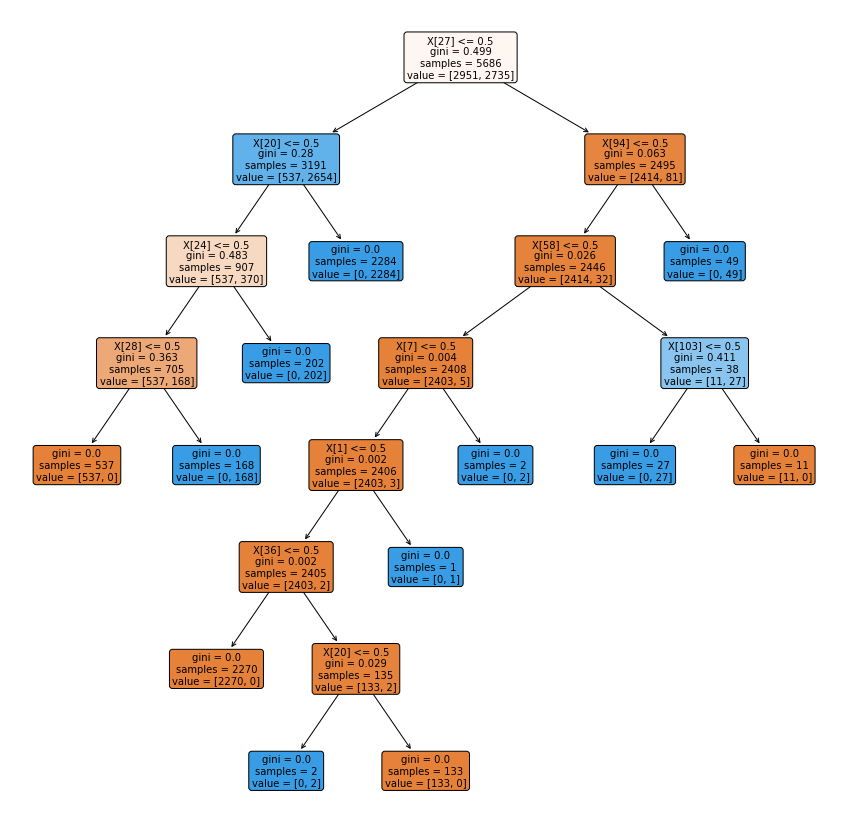

In [47]:
fig, ax = plt.subplots(figsize = (15, 15))  # whatever size you want
tree.plot_tree(classifier, filled = True, rounded = True, fontsize = 10, ax = ax)
plt.show()

Das zeigt den Grund für die fehlerfreie Klassifikation: Der Baum hat die Datenbasis auswendig gelernt (Overfitting). Man sieht es gut an einigen der blauen Blätter, die nur 1 oder 2 Datensätze repräsentieren. 

Das Problem können wir auf mehrere Wegen in den Griff bekommen. Wir könnten 
* mit dem `max_depth` Parameter die maximale Tiefe beschränken, 
* per `min_samples_split` festlegen, dass nur Knoten mit einer gewissen Mindestanzahl an Samples gesplittet werden können,
* mit `max_leaf_nodes` die maximale Blätteranzahl begrenzen,
* oder mit `min_samples_leaf` festlegen, wie viele Samples ein Blatt mindestens enthalten muss.

Letztere Möglichkeit wählen wir, mit Blick auf obiges Ergebnis mit einer Mindestanzahl von 5 Datensätzen pro Blatt.

In [48]:
classifier = tree.DecisionTreeClassifier(min_samples_leaf = 5)
classifier = classifier.fit(X_train, y_train)
print('Mittlere Genauigkeit auf den Trainingsdaten:', classifier.score(X_test, y_test))

pd.crosstab(y_test_label, y_pred_label, rownames = ['True'], colnames = ['Predicted'], margins = True)

Mittlere Genauigkeit auf den Trainingsdaten: 1.0


Predicted,e,p,All
True,,,
e,1257,0,1257
p,0,1181,1181
All,1257,1181,2438


Also immer noch super. Für den finalen plot sollen jetzt noch die korrekten Labels berücksichtigt werden. Hier muss entsprechend unterschieden werden, welches Encoding genutzt wurde.
1. Haben Sie Features sowohl nominal als auch ordinal kodiert, wird es jetzt leider etwas unschön: Der `ColumnTransformer` unterstützt die inverse Transformation nicht, so dass wir nicht ohne weiteres an die benötigten ursprünglichen Label kommen.
Setzten Sie unten dann `simpleEncoding = False`
Siehe: https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html
2. Im Falle des einfachen Encodings setzten Sie `simpleEncoding = True` und erfreuen Sie sich an den passenden Bezeichnungen.

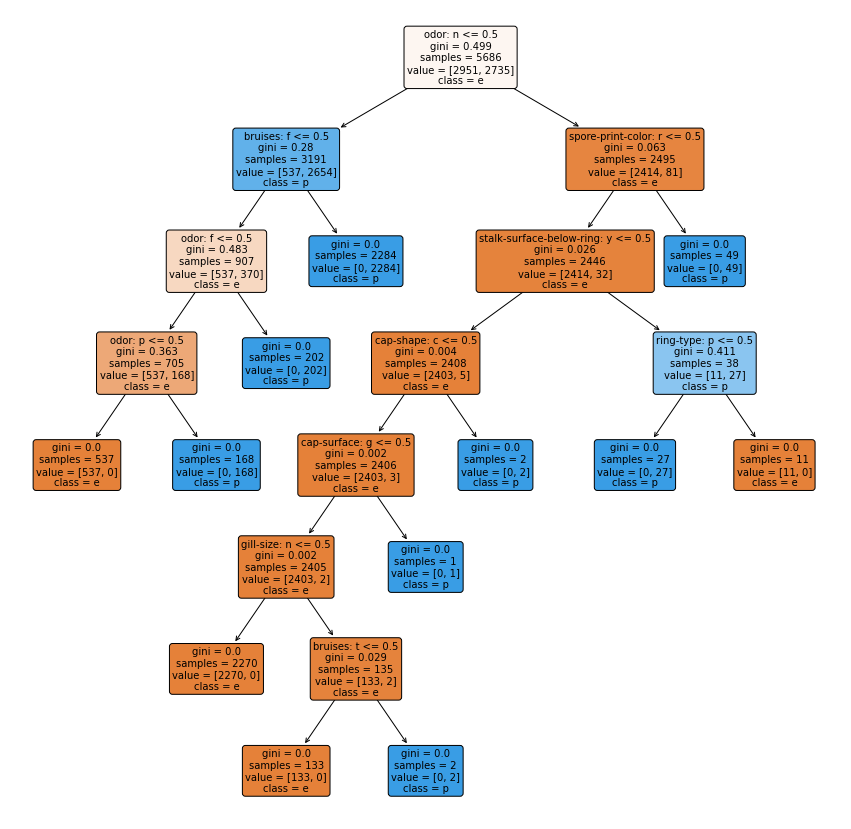

In [69]:
simpleEncoding = True

feature_label = []
if simpleEncoding:
    for idx, column in enumerate(oh_feature_transformer.categories_):
        for c in column:
            feature_label.append(f'{data.columns[idx + 1]}: {c}')
else:
    feature_label = None


fig, ax = plt.subplots(figsize = (15, 15))  # whatever size you want
tree.plot_tree(
    classifier, 
    class_names = label_transformer.inverse_transform(y_test),
    feature_names = feature_label,
    filled = True, 
    rounded = True, 
    fontsize = 10, 
    ax = ax)
plt.show()

Statt Tiefe 7 nur noch 5, immer 5 Elemente pro Konten, kein overfitting


Außerdem war lt. Aufgabe noch die Genauigkeit unseres Modells gefragt.

In [ ]:
print('\nKlassifikationsreport:\n', classification_report(y_test, y_pred, target_names = list(enc_y.classes_)))

Sehr schön. Das hat prima geklappt, 100% Genauigkeit(accuracy) und ein ebenso hoher F1-Wert auch für die unbekannten Testdaten!

Dann kann die nächste Pilzsaison ja kommen. Bon appétit!

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 1.0
Test set score: 1.0


# Abalone

In [72]:
col_names = ['sex', 'length', 'diameter', 'height', 'whole weight', 
             'shucked weight', 'viscera weight', 'shell weight', 'rings']

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
data = pd.read_csv(url, names = col_names)

data.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [73]:
pd.get_dummies(data)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [74]:
# Seprating Predictors and Response 
data_X = data.drop('rings', axis = 1) # Predictors
data_y = data['rings'] # Response

In [76]:
data_X

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [89]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.3, random_state = 42)

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

In [93]:
categorical_features = ['sex']
numeric_features = list(set(data_X.columns) - set(categorical_features))
numeric_features

['diameter',
 'length',
 'shell weight',
 'whole weight',
 'height',
 'shucked weight',
 'viscera weight']

In [94]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [84]:
set(categorical_features)

{'sex'}

In [95]:
from sklearn.neighbors import KNeighborsClassifier


knc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])


knc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['diameter', 'length',
                                                   'shell weight',
                                                   'whole weight', 'height',
                                                   'shucked weight',
                                                   'viscera weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex'])])),
                ('classifier', KNeighborsClassifier())])

In [96]:
y_pred = knc.predict(X_test)

In [97]:
print('\nKlassifikationsreport:\n', classification_report(y_test, y_pred))


Klassifikationsreport:
               precision    recall  f1-score   support

           3       0.09      0.33      0.14         3
           4       0.27      0.37      0.31        19
           5       0.28      0.18      0.22        45
           6       0.24      0.30      0.26        77
           7       0.23      0.27      0.25       129
           8       0.28      0.37      0.32       164
           9       0.26      0.32      0.29       212
          10       0.20      0.23      0.21       191
          11       0.22      0.22      0.22       137
          12       0.08      0.05      0.06        84
          13       0.08      0.06      0.07        53
          14       0.12      0.03      0.05        34
          15       0.40      0.06      0.11        31
          16       0.33      0.10      0.15        21
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00         8
  

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
param_grid = { 
    'classifier__n_neighbors': [1, 2, 3, 4, 5, 6],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2],
    'classifier__leaf_size': [1, 5, 10, 15]}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(knc, param_grid, n_jobs = 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

C:\Users\Stefan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__leaf_size': 1, 'classifier__n_neighbors': 6, 'classifier__p': 1, 'classifier__weights': 'uniform'}
0.2346762674159934


In [101]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=3)
model score: 0.202
SVC(C=0.025, probability=True)
model score: 0.246
DecisionTreeClassifier()
model score: 0.207
RandomForestClassifier()
model score: 0.250
AdaBoostClassifier()
model score: 0.222
GradientBoostingClassifier()
model score: 0.264


# ecoli


In [106]:
col_names = ['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 
             'aac', 'alm1', 'alm2']

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'
data = pd.read_csv(url, sep = '\s+', names = col_names,index_col=False )

data.head()

,Sequence Name,mcg,gvh,lip,chg,aac,alm1,alm2
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35
